<a href="https://colab.research.google.com/github/kiteday/AI_contents/blob/main/b_customLoad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.utils.data as data
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

from torch.autograd import Variable

from PIL import Image

## 드라이브 마운트

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1) train 데이터로 불러올 폴더 지정

In [3]:
img_size = 128

In [19]:
# 파일 경로, 구글 드라이브 리스트에서 복붙
img_dir = "/content/drive/MyDrive/AI_content/my_catdog/train/"

In [20]:
import os

"""
MyGetInfoFromFolder
* 폴더에서 클래스 관련 정보 추충
"""

def MyGetInfoFromFolder(ipath):
  classes = sorted(os.listdir(ipath))
  class_to_idx = {}
  length = 0
  total_file_list=[]
  total_label = []

  for i, c in enumerate(classes): # class folder
    class_to_idx.update({c:i})

    file_list = sorted(os.listdir(ipath+"/"+c))
    length += len(file_list)

    for f in file_list: # image file list
      total_file_list.append(ipath + c + "/" + f)
      total_label.append(i)
  
  return classes, class_to_idx, length, total_file_list, total_label

In [21]:
# 호출 test
classes, class_to_idx, length, total_file_list, total_label = MyGetInfoFromFolder(img_dir)
print(classes)
print(class_to_idx)
print(length)
print(total_file_list[0])
print(total_label[0])

['cats', 'dogs']
{'cats': 0, 'dogs': 1}
10
/content/drive/MyDrive/AI_content/my_catdog/train/cats/images (2).jpeg
0


In [30]:
"""
MyImageFolder
* Customized dataset
폴더 영상을 가져올 수 있는 클래스 객체
"""
class MyImageFolder(Dataset):
  def __init__(self, ipath, transform=transforms.ToTensor()):
    self.classes, self.class_to_idx, self.length, self.files, self.labels = MyGetInfoFromFolder(ipath)
    self.root_dir = ipath
    self.transform=transform

  def __len__(self):
    return self.length # 이 path에 있는 모든 폴더의 모든 이미지 개수

  def __getitem__(self, idx):
    # original image
    img = Image.open(self.files[idx])

    # 예외처리-mode
    if img.mode != "RGB":
      img = img.convert(mode="RGB")

    # 이미지 조정
    img = self.transform(img)

    # label
    label = self.labels[idx]

    return img, label

In [31]:
# Dataset_folder 호출 테스트
my_train = MyImageFolder(img_dir,
                         transforms.Compose([transforms.Resize((img_size, img_size)),
                                             transforms.ToTensor()]
                                            ))


# 2) train 데이터 정보 출력

In [32]:
nclass = len(my_train.classes)
print("# of classes(클래스 개수): %d" %nclass)

print("클래스 이름 : ", my_train.classes)
print("클래스별 인덱스 : ", my_train.class_to_idx)
print("my_train 개수 : ", my_train.__len__())

# of classes(클래스 개수): 2
클래스 이름 :  ['cats', 'dogs']
클래스별 인덱스 :  {'cats': 0, 'dogs': 1}
my_train 개수 :  10


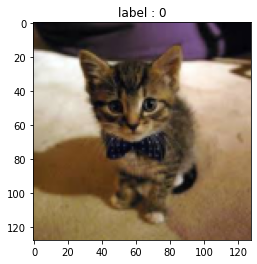

(128, 128, 3)


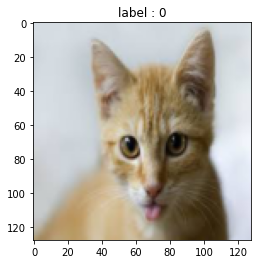

(128, 128, 3)


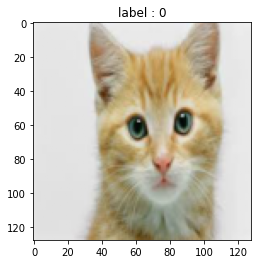

(128, 128, 3)


In [33]:
for i in range(3):
  img = my_train[i][0].numpy()
  img = np.transpose(img, (1,2,0))

  plt.title("label : %d" %my_train[i][1])
  plt.imshow(img)
  plt.show()

  print(img.shape)

# 3) 데이터 로드하기

In [34]:
batch_size = 3

In [35]:
train_loader = data.DataLoader(my_train, batch_size=batch_size,
                               shuffle=False, num_workers=2,
                               drop_last = True)

# 4) 데이터 로더 사용하기

[0]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


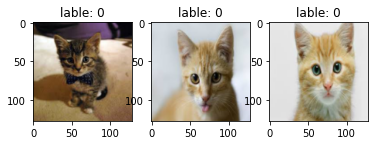

[1]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


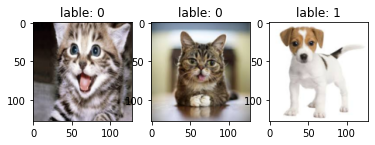

[2]
한 번에 로드되는 데이터 크기: 3
torch.Size([3, 3, 128, 128])
torch.Size([3])


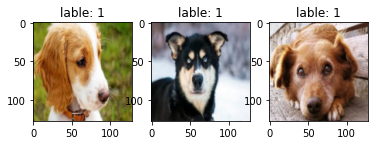

In [36]:
n = 3
for i,[imgs, labels] in enumerate(train_loader): # batch_size 만큼
  if i >5:
    break
  print("[%d]" %i)
  print("한 번에 로드되는 데이터 크기:", len(imgs))

  x = Variable(imgs).cuda()
  y_ = Variable(labels).cuda()

  print(x.shape)
  print(y_.shape)

  for j in range(n):
    img = imgs[j].numpy()
    img = np.transpose(img, (1,2,0))

    plt.subplot(1, n, j+1)
    plt.imshow(img)
    plt.title("lable: %d" %labels[j])
  plt.show()